In [1]:
___Author___='LumberJack Jyss'

In [3]:
print('LumberJack BRUTAL AtidotCom TREND RULES\nLumberJack Jyss 5779(c)')

LumberJack BRUTAL AtidotCom TREND RULES
LumberJack Jyss 5779(c)


In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df =  pd.read_csv('gbpjpy.csv')
#df =  pd.read_csv('dataset_daily.csv')

In [6]:
df.head()

,Date,oc_gbpjpy,hl_gbpjpy,gbpjpy_close,gbpjpy_Doc,gbpjpy_Dhl,rsi_gbpjpy,GBPJPY,short_gbpjpy,long_gbpjpy
0,20180507 00:45:00,-0.0080,0.0320,0.000054,-0.726644,-0.389734,78.889990,147.6740,0,0
1,20180507 01:00:00,-0.0810,0.0915,0.000549,9.240506,1.853583,96.560633,147.7550,0,0
2,20180507 01:15:00,-0.0525,0.0850,0.000355,-0.352287,-0.070961,98.350499,147.8075,0,0
3,20180507 01:30:00,0.0710,0.0830,-0.000480,-2.356870,-0.023502,40.850462,147.7365,0,0
4,20180507 01:45:00,0.0510,0.1225,-0.000345,-0.281294,0.475331,22.202409,147.6855,0,0


In [7]:
df.set_index(df['Date'],drop=True,inplace=True)
df = df.iloc[:,1:8]
df.head()

,oc_gbpjpy,hl_gbpjpy,gbpjpy_close,gbpjpy_Doc,gbpjpy_Dhl,rsi_gbpjpy,GBPJPY
Date,,,,,,,
20180507 00:45:00,-0.0080,0.0320,0.000054,-0.726644,-0.389734,78.889990,147.6740
20180507 01:00:00,-0.0810,0.0915,0.000549,9.240506,1.853583,96.560633,147.7550
20180507 01:15:00,-0.0525,0.0850,0.000355,-0.352287,-0.070961,98.350499,147.8075
20180507 01:30:00,0.0710,0.0830,-0.000480,-2.356870,-0.023502,40.850462,147.7365
20180507 01:45:00,0.0510,0.1225,-0.000345,-0.281294,0.475331,22.202409,147.6855


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24475 entries, 20180507  00:45:00 to 20190506  00:15:00
Data columns (total 7 columns):
oc_gbpjpy       24475 non-null float64
hl_gbpjpy       24475 non-null float64
gbpjpy_close    24475 non-null float64
gbpjpy_Doc      24475 non-null float64
gbpjpy_Dhl      24475 non-null float64
rsi_gbpjpy      24475 non-null float64
GBPJPY          24475 non-null float64
dtypes: float64(7)
memory usage: 1.5+ MB


In [9]:
df.shape

(24475, 7)

In [10]:
df.shape[0]

24475

In [11]:
df.tail()

,oc_gbpjpy,hl_gbpjpy,gbpjpy_close,gbpjpy_Doc,gbpjpy_Dhl,rsi_gbpjpy,GBPJPY
Date,,,,,,,
20190505 23:15:00,0.0310,0.5090,-0.005530,-1.351810,3.292580,5.317128,145.5680
20190505 23:30:00,-0.0515,0.2115,0.000354,-2.652733,-0.584365,15.463869,145.6195
20190505 23:45:00,0.0570,0.1670,-0.000391,-2.110895,-0.210302,12.498876,145.5625
20190506 00:00:00,-0.1975,0.2675,0.001357,-4.457093,0.601436,62.424947,145.7600
20190506 00:15:00,0.0315,0.1090,-0.000216,-1.160081,-0.592302,52.812688,145.7285


In [16]:
long_list = []
short_list = []
equity_list = []
var_long_list = []
var_short_list = []
candle_close = 0
candle_close_1 = 0
candle_close_2 = 0
candle_close_3 = 0
candle_close_4 = 0
candle_close_5 = 0
candle_open = 0
candle_high = 0
candle_low = 0
c = 0
cc = 0
long_target = 0.2
short_target = -0.3
ticket = 100000
equity = 100000
print('Début de la boucle')

import sys
orig_stdout = sys.stdout
f = open('OUt_rules.txt', 'w')
sys.stdout = f


for i in range(5,df.shape[0]-1):
    print('\nCompteur de ligne :',i)
    print('Date :',df.index[i])
    c+=1
    
    candle_close = float(df.iloc[i,6])
    candle_close_1 = float(df.iloc[i-1,6])
    print('candle_close_1',candle_close_1)
    candle_close_2 = float(df.iloc[i-2,6])
    candle_close_3 = float(df.iloc[i-3,6])
    candle_close_4 = float(df.iloc[i-4,6])
    candle_close_5 = float(df.iloc[i-5,6])
    
    
    var1 = candle_close - candle_close_1
    var2 = candle_close - candle_close_2
    var3 = candle_close - candle_close_3
    var4 = candle_close - candle_close_4
    var5 = candle_close - candle_close_5
    
    if var1 > long_target or var2 > long_target or\
    var3 > long_target or var4 > long_target or var5 > long_target:
        var_long_list.append(var1)
        var_long_list.append(var2)
        var_long_list.append(var3)
        var_long_list.append(var4)
        var_long_list.append(var5)
        print('\nDate :',df.index[i])
        print('Long effectué, :',var1,', ',var2,', ',var3,', ',var4)
        print('close actuel',candle_close)
        print("les 4 close d'avant",\
              candle_close_1,candle_close_2,candle_close_3,\
              candle_close_4,candle_close_5)
        print('Max ',max(var_long_list))
        print('pnl :',max(var_long_list))
        equity = equity -3 + max(var_long_list)*ticket
        #equity = equity - 3 + max(var_long_list)*ticket
        print('Nouvel equity :',equity)
        long_list.append(1)
        short_list.append(0)
        equity_list.append(equity)
        cc+=1
        var_long_list = []
    
    elif var1 < short_target or var2 < short_target or \
    var3 < short_target or var4 < short_target or var5 < short_target:
        var_short_list.append(var1)
        var_short_list.append(var2)
        var_short_list.append(var3)
        var_short_list.append(var4)
        var_short_list.append(var5)
        print('\nDate :',df.index[i])
        print('Short effectué :',var1,', ',var2,', ',var3,', ',var4)
        print('close actuel',candle_close)
        print("les 4 close d'avant",\
              candle_close_1,candle_close_2,candle_close_3,\
              candle_close_4,candle_close_5)
        print('Min ',-min(var_short_list))
        print('pnl :', - min(var_short_list))
        equity = equity -3 - min(var_short_list)*ticket
        #equity = equity - 3 - min(var_short_list)*ticket
        print('Nouvel equity :',equity)
        short_list.append(1)
        long_list.append(0)
        equity_list.append(equity)
        cc+=1
        var_short_list = []
    
    else :
        print('\nDate :',df.index[i])
        print('Il ne se passe rien')
        short_list.append(0)
        long_list.append(0)
        equity_list.append(equity)
        cc+=1


print('Boucle terminée')
print('La long target était fixée à ',long_target)
print('La short target était fixée à ',short_target)
print('La règle était 4 périodes consécutives au dessus de long ou au dessous de short')
print('Il y a eu ',df.shape[0],' périodes testées')
print('Durant cette période,',sum(long_list),' long et ',sum(short_list),' short')
print("Les gains totaux s'élèvent à :",round(equity-100000),'$' )
    
f.close()
sys.stdout = orig_stdout


print('Boucle terminée')
print('La long target était fixée à ',long_target)
print('La short target était fixée à ',short_target)
print("La règle était qu'une des 5 periodes d'avant était inférieure ou supérieure à la target (long ou short)")
print('Il y a eu ',df.shape[0],' périodes testées')
print('Durant cette période,',sum(long_list),' long et ',sum(short_list),' short')
print("Les gains totaux s'élèvent à :",round(equity-100000),'$' )

var_dtf = pd.DataFrame()
var_dtf['Long'] = long_list
var_dtf['Short'] = short_list
var_dtf['Equity'] = equity_list

 
    

Début de la boucle
Boucle terminée
La long target était fixée à  0.2
La short target était fixée à  -0.3
La règle était qu'une des 5 periodes d'avant était inférieure ou supérieure à la target (long ou short)
Il y a eu  24475  périodes testées
Durant cette période, 3406  long et  1476  short
Les gains totaux s'élèvent à : 186121654 $


In [17]:
candle_close,candle_close_1,candle_close_2,candle_close_3,candle_close_4,candle_close_5,candle_open

(145.76, 145.5625, 145.6195, 145.56799999999996, 146.3775, 146.289, 0)

In [18]:
sum(short_list)+sum(long_list), c, cc, len(short_list),len(long_list),len(equity_list),len(df)

(4882, 24469, 24469, 24469, 24469, 24469, 24475)

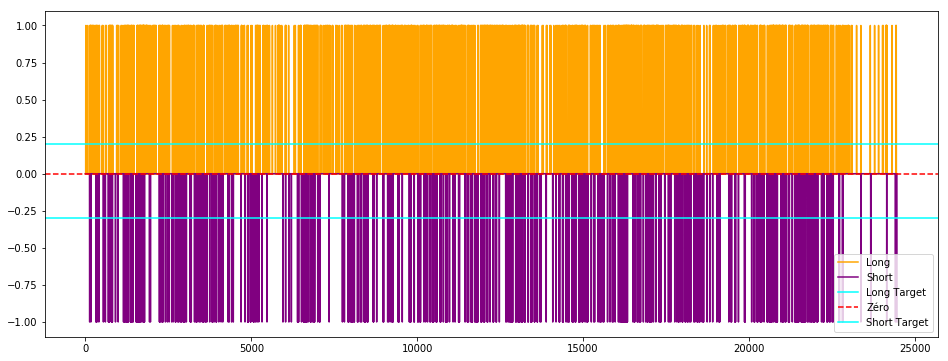

In [19]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Long'],color='orange',label='Long')
plt.plot(-var_dtf['Short'],color='purple',label='Short')
plt.axhline(y=long_target, color='cyan',linestyle='-', label='Long Target')
plt.axhline(y=0, color='red',linestyle='--', label='Zéro')
plt.axhline(y=short_target,color='cyan',label='Short Target')
plt.legend()

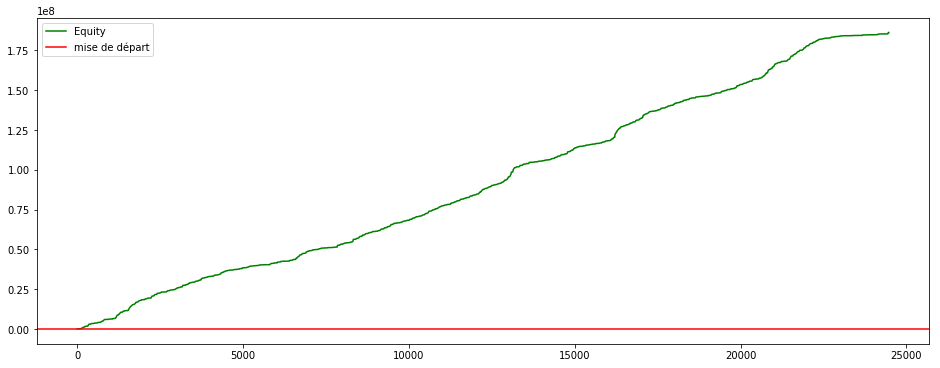

In [20]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Equity'],color='green',label='Equity')
plt.axhline(y=100000., color='red',linestyle='-', label='mise de départ')
plt.legend()

In [21]:
len(short_list),len(long_list),len(df)

(24469, 24469, 24475)

In [22]:
df = df.iloc[5:(df.shape[0]-1),:]
df['short_gbpjpy'] = short_list
df['long_gbpjpy'] = long_list

In [23]:
print('Nombre de positions de long trouvées :',sum(long_list))
print('Nombre de positions short trouvées :',sum(short_list))
print('Sur un total de ',sum(short_list)+sum(long_list))

Nombre de positions de long trouvées : 3406
Nombre de positions short trouvées : 1476
Sur un total de  4882


In [24]:
print('Sur un achat systématique, les gains représentent',\
      round((sum(short_list)+sum(long_list))/(len(short_list)+len(long_list))*100,2),'%')

Sur un achat systématique, les gains représentent 9.98 %


In [25]:
#df['short'] = df['trend'].shift(-1)
df['short_gbpjpy'].sum(),df['long_gbpjpy'].sum()

(1476, 3406)

In [26]:
df.tail()

,oc_gbpjpy,hl_gbpjpy,gbpjpy_close,gbpjpy_Doc,gbpjpy_Dhl,rsi_gbpjpy,GBPJPY,short_gbpjpy,long_gbpjpy
Date,,,,,,,,,
20190503 22:45:00,-0.0885,0.1185,0.000605,-29.516129,1.343874,93.826793,146.3775,0,0
20190505 23:15:00,0.0310,0.5090,-0.005530,-1.351810,3.292580,5.317128,145.5680,1,0
20190505 23:30:00,-0.0515,0.2115,0.000354,-2.652733,-0.584365,15.463869,145.6195,1,0
20190505 23:45:00,0.0570,0.1670,-0.000391,-2.110895,-0.210302,12.498876,145.5625,1,0
20190506 00:00:00,-0.1975,0.2675,0.001357,-4.457093,0.601436,62.424947,145.7600,1,0


In [27]:
df = df.dropna()
df.tail()

,oc_gbpjpy,hl_gbpjpy,gbpjpy_close,gbpjpy_Doc,gbpjpy_Dhl,rsi_gbpjpy,GBPJPY,short_gbpjpy,long_gbpjpy
Date,,,,,,,,,
20190503 22:45:00,-0.0885,0.1185,0.000605,-29.516129,1.343874,93.826793,146.3775,0,0
20190505 23:15:00,0.0310,0.5090,-0.005530,-1.351810,3.292580,5.317128,145.5680,1,0
20190505 23:30:00,-0.0515,0.2115,0.000354,-2.652733,-0.584365,15.463869,145.6195,1,0
20190505 23:45:00,0.0570,0.1670,-0.000391,-2.110895,-0.210302,12.498876,145.5625,1,0
20190506 00:00:00,-0.1975,0.2675,0.001357,-4.457093,0.601436,62.424947,145.7600,1,0


In [28]:
df['short_gbpjpy'].sum(),df['long_gbpjpy'].sum()

(1476, 3406)

In [29]:
df.to_csv('dataset_Ruled.csv')